# TAREA SEMANAL 

##  Alvaro Cesar Tauma Salvador 

* Generar nuevas transformaciones para optimizar al modelo (ejemplo: Dummizar la variable Marca, eliminar outliers, eliminar las variables con alto p_value, etc.).

* Usar otro método de suavizamiento al target.

* Usar otros modelos bases para comparar al modelo (ya se usaron: Lineal, Ridge, Laso y Elastic Net)

* Usar optimizadores para ajustar buenos parámetros a los modelos que se usaran (incluir a Ridge, Lasso y ElasticNet), mostrando cuales son sus resultados.


In [1073]:
#!pip install statsmodels

In [1074]:
# Import necessary libs

import pandas as pd
import numpy as np
from sklearn import preprocessing
from math import sqrt

import warnings
warnings.filterwarnings('ignore')
from scipy import stats

## Modelos de regresion
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm           
import statsmodels.formula.api as smf  

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Metricas de evaluación
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

#separar train and test
from sklearn.model_selection import train_test_split

# estadística y matemáticas
#import pandas as pd
import scipy.stats as scy
from scipy.stats import kurtosis

## Lectura de datos

In [1075]:
dataset = pd.read_csv('demanda_data.csv',sep=';',parse_dates = ['tiempo'])
dataset


,tiempo,Costo,PrecioOfertaProm,NroTipoOfertas,Marca,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica,UnidadesDemandas
0,01/01/2005,45.08,19.9,1,B,1,0.585294,0.000000,0.000000,0,0,2032
1,02/01/2005,24.56,69.9,1,A,1,0.499286,0.000000,0.000000,0,0,603
2,03/01/2005,104.01,41.9,1,D,1,0.487209,0.000000,0.000000,0,0,10819
3,04/01/2005,59.23,33.9,1,B,1,0.498529,0.000000,0.000000,0,0,3508
4,05/01/2005,24.74,85.0,1,A,1,0.500000,0.000000,0.000000,0,0,612
...,...,...,...,...,...,...,...,...,...,...,...,...
3842,19/07/2015,14.93,22.9,1,B,1,0.497826,0.000000,0.000000,0,0,1765
3843,20/07/2015,31.43,49.9,1,A,1,0.631646,0.000000,0.000000,0,0,352
3844,21/07/2015,58.06,22.9,1,B,1,0.636111,0.000000,0.000000,0,0,1203
3845,22/07/2015,31.84,41.9,1,A,1,0.644615,0.000000,0.000000,0,0,222


## Análisis Exploratorio de los Datos (EDA)

In [1076]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tiempo                    3847 non-null   object 
 1   Costo                     3847 non-null   float64
 2   PrecioOfertaProm          3847 non-null   float64
 3   NroTipoOfertas            3847 non-null   int64  
 4   Marca                     3847 non-null   object 
 5   CantOfertas               3847 non-null   int64  
 6   MaxDescuento%             3847 non-null   float64
 7   minDescuento%             3847 non-null   float64
 8   FactordeDescuentos        3847 non-null   float64
 9   FlagCampana               3847 non-null   int64  
 10  TieneUbicacionEspecifica  3847 non-null   int64  
 11  UnidadesDemandas          3847 non-null   int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 360.8+ KB


In [1077]:
dataset.shape

(3847, 12)

## Preprocesmiento de la data

In [1078]:
# Selección de variables categóricas
target = 'UnidadesDemandas'
exclude = ['tiempo']

# Obtener columnas que no son 'tiempo' ni la variable objetivo 'UnidadesDemandas'
cols = [x for x in dataset.columns 
        if x not in exclude + [target]]

# Filtrar columnas que son de tipo 'object' (categóricas)
cols_cat = dataset[cols].select_dtypes(['object']).columns.tolist()

# Obtener índices y nombres de las columnas categóricas
index_categorical = [cols.index(x) for x in cols_cat]
print(exclude, '\n\n', index_categorical, cols_cat)

# Para entrenamiento
for i in cols_cat:
    # Inicializar y ajustar un LabelEncoder para cada columna categórica
    le = preprocessing.LabelEncoder()
    le.fit(list(dataset[i].dropna()))

    # Transformar los valores no nulos en la columna con el LabelEncoder ajustado
    dataset.loc[~dataset[i].isnull(), i] = le.transform(dataset[i].dropna())

# Mostrar las primeras filas del conjunto de datos modificado
dataset[cols].head()

['tiempo'] 

 [3] ['Marca']


,Costo,PrecioOfertaProm,NroTipoOfertas,Marca,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica
0,45.08,19.9,1,1,1,0.585294,0.0,0.0,0,0
1,24.56,69.9,1,0,1,0.499286,0.0,0.0,0,0
2,104.01,41.9,1,3,1,0.487209,0.0,0.0,0,0
3,59.23,33.9,1,1,1,0.498529,0.0,0.0,0,0
4,24.74,85.0,1,0,1,0.500000,0.0,0.0,0,0


In [1079]:
# Convertir la columna 'Marca' a tipo int64
dataset['Marca'] = dataset['Marca'].astype('int64')

In [1080]:
dataset.isnull().sum().sum()

0

In [1081]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tiempo                    3847 non-null   object 
 1   Costo                     3847 non-null   float64
 2   PrecioOfertaProm          3847 non-null   float64
 3   NroTipoOfertas            3847 non-null   int64  
 4   Marca                     3847 non-null   int64  
 5   CantOfertas               3847 non-null   int64  
 6   MaxDescuento%             3847 non-null   float64
 7   minDescuento%             3847 non-null   float64
 8   FactordeDescuentos        3847 non-null   float64
 9   FlagCampana               3847 non-null   int64  
 10  TieneUbicacionEspecifica  3847 non-null   int64  
 11  UnidadesDemandas          3847 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 360.8+ KB


In [1082]:
dataset.describe()

,Costo,PrecioOfertaProm,NroTipoOfertas,Marca,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica,UnidadesDemandas
count,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000
mean,46.805753,51.156202,1.243566,0.903561,1.049649,0.600289,0.076029,0.046798,0.002599,0.001560,4518.254744
std,35.658520,30.549777,0.439466,0.983380,0.251629,0.079967,0.150116,0.093907,0.050925,0.039467,7135.468259
min,2.600000,8.000000,1.000000,0.000000,0.000000,0.311250,0.000000,0.000000,0.000000,0.000000,7.000000
25%,22.430000,29.900000,1.000000,0.000000,1.000000,0.540000,0.000000,0.000000,0.000000,0.000000,472.500000
50%,34.940000,39.900000,1.000000,1.000000,1.000000,0.615753,0.000000,0.000000,0.000000,0.000000,1472.000000
75%,62.765000,72.900000,1.000000,1.000000,1.000000,0.656722,0.000000,0.000000,0.000000,0.000000,5462.500000
max,237.400000,149.000000,3.000000,3.000000,6.000000,0.810135,0.472632,0.347757,1.000000,1.000000,59031.000000


In [1083]:
dataset2= dataset.drop(['tiempo',
                  'CantOfertas',
                  'TieneUbicacionEspecifica'], axis=1)


In [1084]:
#Conjunto de datos con valores atipicos
X0 = dataset2.drop(['UnidadesDemandas'], axis=1)
y0 = dataset2[['UnidadesDemandas']]

In [1085]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Costo               3847 non-null   float64
 1   PrecioOfertaProm    3847 non-null   float64
 2   NroTipoOfertas      3847 non-null   int64  
 3   Marca               3847 non-null   int64  
 4   MaxDescuento%       3847 non-null   float64
 5   minDescuento%       3847 non-null   float64
 6   FactordeDescuentos  3847 non-null   float64
 7   FlagCampana         3847 non-null   int64  
 8   UnidadesDemandas    3847 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 270.6 KB


## Gráficos de Cajas

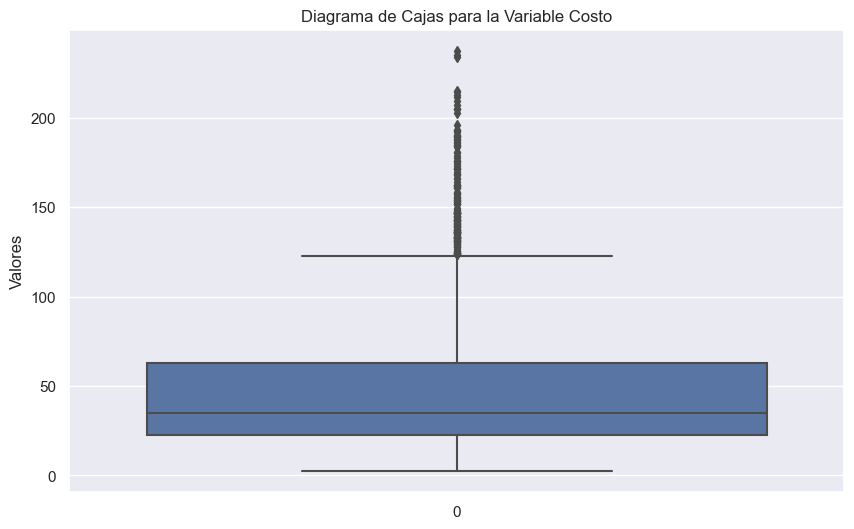

In [1086]:
# Diagrama de cajas 
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset2['Costo'])
plt.title('Diagrama de Cajas para la Variable Costo')
plt.ylabel('Valores')
plt.show()

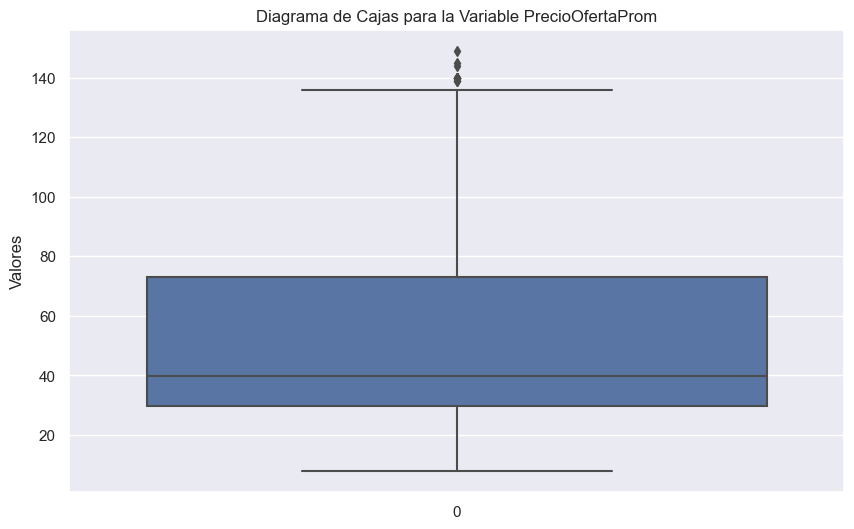

In [1087]:
# Diagrama de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset2['PrecioOfertaProm'])
plt.title('Diagrama de Cajas para la Variable PrecioOfertaProm')
plt.ylabel('Valores')
plt.show()

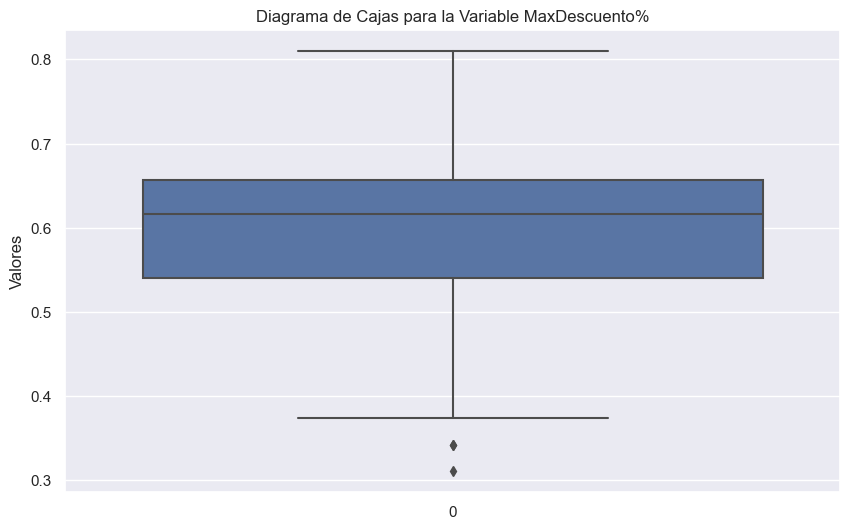

In [1088]:
# Diagrama de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset2['MaxDescuento%'])
plt.title('Diagrama de Cajas para la Variable MaxDescuento%')
plt.ylabel('Valores')
plt.show()

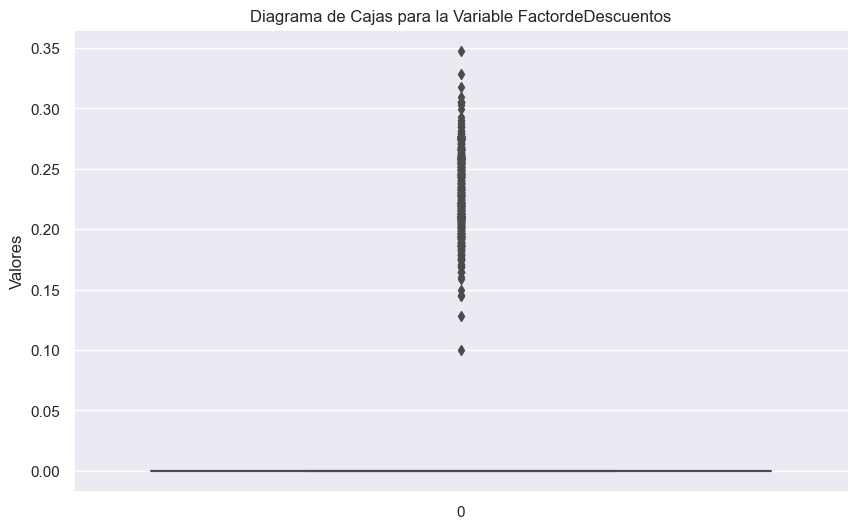

In [1089]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset2['FactordeDescuentos'])
plt.title('Diagrama de Cajas para la Variable FactordeDescuentos')
plt.ylabel('Valores')
plt.show()

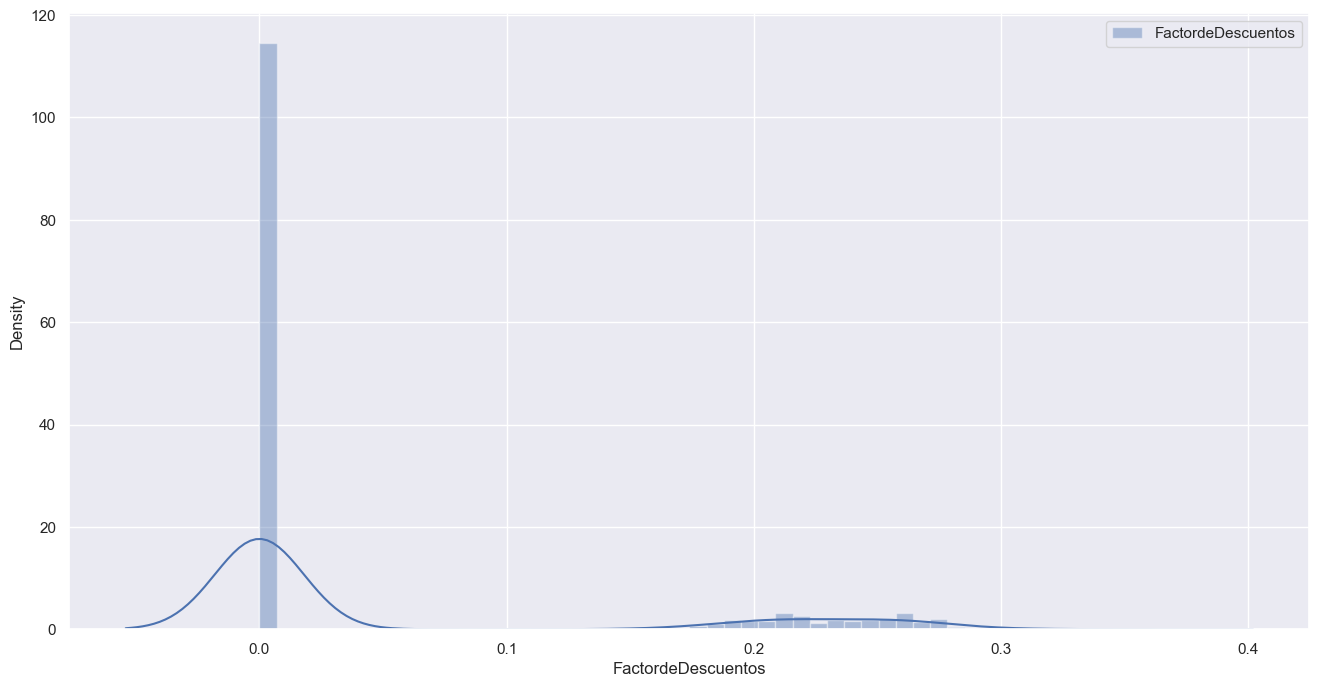

In [1090]:
sns.set()
plt.figure(figsize=(16,8))
sns.distplot(dataset2["FactordeDescuentos"] , label="FactordeDescuentos")
plt.legend()
plt.show()


*  Se observa valores atipicos en las variables  Costo,PrecioOfertaProm y MaxDescuento




In [1091]:
dataset2['FactordeDescuentos'].value_counts()

FactordeDescuentos
0.000000    3067
0.260083      16
0.258836      15
0.208772      13
0.245610      11
            ... 
0.264027       1
0.248821       1
0.220341       1
0.264071       1
0.251637       1
Name: count, Length: 394, dtype: int64

In [1092]:
dataset2['FlagCampana'].value_counts()

FlagCampana
0    3837
1      10
Name: count, dtype: int64

In [1093]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Costo               3847 non-null   float64
 1   PrecioOfertaProm    3847 non-null   float64
 2   NroTipoOfertas      3847 non-null   int64  
 3   Marca               3847 non-null   int64  
 4   MaxDescuento%       3847 non-null   float64
 5   minDescuento%       3847 non-null   float64
 6   FactordeDescuentos  3847 non-null   float64
 7   FlagCampana         3847 non-null   int64  
 8   UnidadesDemandas    3847 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 270.6 KB


In [1094]:
datasetsinatipicos=dataset2

* **Generar nuevas transformaciones para optimizar al modelo (ejemplo: Dummizar la variable Marca, eliminar outliers, eliminar las variables con alto p_value, etc.).**

## Funcion para detectar outlier

## Eliminar valores atipicos de cada variable

###  Variable Costo

In [1095]:
datoatipico = datasetsinatipicos['Costo']  # Accede a la columna 'Costo' directamente
Q3 = np.percentile(datasetsinatipicos['Costo'] , 75)
Q1 = np.percentile(datasetsinatipicos['Costo'], 25)
RI = Q3-Q1
LI = Q3-RI*1.5
LS = Q3+RI*1.5
Esvaloratipico = []
indicevaloratipico=[]

for i in range(len(datoatipico)):
    if datoatipico[i] >= LI and datoatipico[i] <= LS:
        Esvaloratipico.append(False)
    else:
        Esvaloratipico.append(True)
        indicevaloratipico.append(i)
        i=i + 1

In [1096]:
print([LI,LS]) # Limites que me indican si la observacion es un valor atipico

[2.262500000000003, 123.2675]


In [1097]:
indicevaloratipico

[7,
 29,
 40,
 58,
 93,
 109,
 140,
 154,
 206,
 210,
 221,
 228,
 231,
 245,
 254,
 277,
 293,
 302,
 326,
 375,
 382,
 384,
 395,
 419,
 429,
 438,
 447,
 490,
 501,
 502,
 513,
 518,
 537,
 546,
 558,
 563,
 573,
 619,
 628,
 634,
 658,
 707,
 708,
 710,
 721,
 722,
 732,
 736,
 737,
 749,
 756,
 765,
 778,
 812,
 828,
 835,
 858,
 869,
 894,
 895,
 896,
 934,
 946,
 973,
 986,
 995,
 1024,
 1026,
 1055,
 1088,
 1124,
 1137,
 1146,
 1151,
 1167,
 1178,
 1180,
 1185,
 1221,
 1233,
 1237,
 1254,
 1258,
 1279,
 1282,
 1288,
 1309,
 1331,
 1344,
 1371,
 1381,
 1403,
 1432,
 1444,
 1451,
 1470,
 1473,
 1484,
 1491,
 1496,
 1534,
 1562,
 1565,
 1569,
 1577,
 1583,
 1586,
 1604,
 1643,
 1648,
 1654,
 1660,
 1678,
 1680,
 1684,
 1686,
 1695,
 1704,
 1711,
 1717,
 1734,
 1746,
 1764,
 1767,
 1775,
 1782,
 1785,
 1799,
 1803,
 1817,
 1869,
 1870,
 1878,
 1909,
 1926,
 1930,
 1931,
 1933,
 1943,
 1948,
 1968,
 1970,
 1975,
 1977,
 1984,
 2002,
 2024,
 2030,
 2039,
 2042,
 2053,
 2057,
 2112,
 

In [1098]:
datasetconatipicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3441 entries, 0 to 3846
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Costo               3441 non-null   float64
 1   PrecioOfertaProm    3441 non-null   float64
 2   NroTipoOfertas      3441 non-null   int64  
 3   Marca               3441 non-null   int64  
 4   MaxDescuento%       3441 non-null   float64
 5   minDescuento%       3441 non-null   float64
 6   FactordeDescuentos  3441 non-null   float64
 7   FlagCampana         3441 non-null   int64  
 8   UnidadesDemandas    3441 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 268.8 KB


In [1099]:
dataset2.iloc[7,0] # Se confirma que la observacion 7 si es un valor atipico

157.8

In [1100]:
dataset2.iloc[:,0]

0        45.08
1        24.56
2       104.01
3        59.23
4        24.74
         ...  
3842     14.93
3843     31.43
3844     58.06
3845     31.84
3846     33.51
Name: Costo, Length: 3847, dtype: float64

In [1101]:
datasetconatipicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3441 entries, 0 to 3846
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Costo               3441 non-null   float64
 1   PrecioOfertaProm    3441 non-null   float64
 2   NroTipoOfertas      3441 non-null   int64  
 3   Marca               3441 non-null   int64  
 4   MaxDescuento%       3441 non-null   float64
 5   minDescuento%       3441 non-null   float64
 6   FactordeDescuentos  3441 non-null   float64
 7   FlagCampana         3441 non-null   int64  
 8   UnidadesDemandas    3441 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 268.8 KB


In [1102]:
datasetsinatipicos['Costo'][indicevaloratipico]

7       157.80
29      178.46
40      185.68
58      125.63
93      181.10
         ...  
2172    144.41
2189    124.78
2199    154.38
3795    139.70
3807    187.78
Name: Costo, Length: 162, dtype: float64

In [1103]:
datasetsinatipicos['Costo'][indicevaloratipico] = np.nan #se reemplaza los atipicos por NA

In [1104]:
datasetsinatipicos['Costo'][indicevaloratipico]# ahora los valores atipicos tienen NA

7      NaN
29     NaN
40     NaN
58     NaN
93     NaN
        ..
2172   NaN
2189   NaN
2199   NaN
3795   NaN
3807   NaN
Name: Costo, Length: 162, dtype: float64

In [1105]:
datasetsinatipicos.iloc[7,0]

nan

###  Variable PrecioOfertaProm

In [1106]:
datoatipico = datasetsinatipicos['PrecioOfertaProm']  # 
Q3 = np.percentile(datasetsinatipicos['PrecioOfertaProm'] , 75)
Q1 = np.percentile(datasetsinatipicos['PrecioOfertaProm'], 25)
RI = Q3-Q1
LI = Q3-RI*1.5
LS = Q3+RI*1.5
Esvaloratipico = []
indicevaloratipico=[]

for i in range(len(datoatipico)):
    if datoatipico[i] >= LI and datoatipico[i] <= LS:
        Esvaloratipico.append(False)
    else:
        Esvaloratipico.append(True)
        indicevaloratipico.append(i)
        i=i + 1

In [1107]:
print([LI,LS]) # Limites que me indican si la observacion es un valor atipico

[8.399999999999991, 137.40000000000003]


In [1108]:
indicevaloratipico

[27, 1186, 1260, 1489, 1845, 1848, 2305, 2638, 3167, 3284, 3305, 3760]

In [1109]:
datasetsinatipicos.iloc[27,1] # Se confirma que la observacion 27 si es un valor atipico

149.0

In [1110]:
datasetsinatipicos['PrecioOfertaProm'][indicevaloratipico] = np.nan #se reemplaza los atipicos por NA

In [1111]:
datasetsinatipicos.iloc[27,1] # ahora los valores atipicos tienen NA

nan

###  Variable MaxDescuento%

In [1112]:
datoatipico = datasetsinatipicos['MaxDescuento%']  # Accede a la columna 'Costo' directamente
Q3 = np.percentile(datasetsinatipicos['MaxDescuento%'] , 75)
Q1 = np.percentile(datasetsinatipicos['MaxDescuento%'], 25)
RI = Q3-Q1
LI = Q3-RI*1.5
LS = Q3+RI*1.5
Esvaloratipico = []
indicevaloratipico=[]

for i in range(len(datoatipico)):
    if datoatipico[i] >= LI and datoatipico[i] <= LS:
        Esvaloratipico.append(False)
    else:
        Esvaloratipico.append(True)
        indicevaloratipico.append(i)
        i=i + 1

In [1113]:
print([LI,LS]) # Limites que me indican si la observacion es un valor atipico

[0.481638828, 0.8318058600000001]


In [1114]:
indicevaloratipico

[20,
 34,
 45,
 69,
 81,
 93,
 103,
 108,
 123,
 130,
 141,
 148,
 157,
 191,
 193,
 252,
 254,
 257,
 260,
 277,
 282,
 293,
 322,
 369,
 400,
 419,
 429,
 438,
 447,
 449,
 490,
 518,
 526,
 528,
 539,
 563,
 584,
 591,
 596,
 604,
 619,
 640,
 680,
 707,
 715,
 737,
 738,
 756,
 771,
 775,
 787,
 791,
 792,
 858,
 880,
 894,
 896,
 910,
 913,
 931,
 934,
 953,
 957,
 968,
 971,
 973,
 983,
 1011,
 1026,
 1035,
 1041,
 1049,
 1076,
 1124,
 1155,
 1158,
 1179,
 1185,
 1191,
 1225,
 1227,
 1230,
 1248,
 1254,
 1258,
 1262,
 1270,
 1271,
 1273,
 1277,
 1284,
 1331,
 1332,
 1344,
 1355,
 1370,
 1375,
 1380,
 1381,
 1420,
 1424,
 1442,
 1445,
 1447,
 1451,
 1484,
 1485,
 1491,
 1512,
 1515,
 1517,
 1539,
 1550,
 1554,
 1559,
 1565,
 1567,
 1575,
 1583,
 1609,
 1623,
 1637,
 1643,
 1648,
 1680,
 1684,
 1713,
 1734,
 1735,
 1745,
 1770,
 1780,
 1782,
 1803,
 1807,
 1829,
 1852,
 1865,
 1870,
 1878,
 1926,
 1930,
 1943,
 1945,
 1948,
 1975,
 1977,
 1989,
 2020,
 2023,
 2053,
 2059,
 2115,
 2

In [1115]:
datasetsinatipicos.iloc[34,4] # Se confirma que la observacion 34 si es un valor atipico

0.455932203

In [1116]:
datasetsinatipicos['MaxDescuento%'][indicevaloratipico] = np.nan #se reemplaza los atipicos por NA

In [1117]:
datasetsinatipicos.iloc[34,4]  # ahora los valores atipicos tienen NA

nan

In [1118]:
dataset2sinatipico=datasetsinatipicos.dropna() 
# se eliminaron todos las valores atipicos de 3 variables  (Costo,PrecioOfertaProm,MaxDescuento%)

In [1119]:
X0.shape

(3847, 8)

In [1120]:
dataset2sinatipico.shape # podemos observar que se eliminaron 406 observaciones

(3441, 9)

In [1121]:
datasetconatipicos=datasetconatipicos.dropna() 
datasetconatipicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3441 entries, 0 to 3846
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Costo               3441 non-null   float64
 1   PrecioOfertaProm    3441 non-null   float64
 2   NroTipoOfertas      3441 non-null   int64  
 3   Marca               3441 non-null   int64  
 4   MaxDescuento%       3441 non-null   float64
 5   minDescuento%       3441 non-null   float64
 6   FactordeDescuentos  3441 non-null   float64
 7   FlagCampana         3441 non-null   int64  
 8   UnidadesDemandas    3441 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 268.8 KB


## Particion de la  data 

In [1122]:
#Conjunto de datos sin valores atipicos
X = dataset2sinatipico.drop(['UnidadesDemandas'], axis=1)
y = dataset2sinatipico[['UnidadesDemandas']]

In [1123]:
X0.info() #Predictoras con valores atipicos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Costo               3847 non-null   float64
 1   PrecioOfertaProm    3847 non-null   float64
 2   NroTipoOfertas      3847 non-null   int64  
 3   Marca               3847 non-null   int64  
 4   MaxDescuento%       3847 non-null   float64
 5   minDescuento%       3847 non-null   float64
 6   FactordeDescuentos  3847 non-null   float64
 7   FlagCampana         3847 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 240.6 KB


In [1124]:
X.info()#Predictoras sin valores atipicos

<class 'pandas.core.frame.DataFrame'>
Index: 3441 entries, 0 to 3846
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Costo               3441 non-null   float64
 1   PrecioOfertaProm    3441 non-null   float64
 2   NroTipoOfertas      3441 non-null   int64  
 3   Marca               3441 non-null   int64  
 4   MaxDescuento%       3441 non-null   float64
 5   minDescuento%       3441 non-null   float64
 6   FactordeDescuentos  3441 non-null   float64
 7   FlagCampana         3441 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 241.9 KB


In [1125]:
#Conjunto de datos con valores atipicos 
from sklearn.model_selection import train_test_split
X0_train, X0_test, y0_train, y0_test = train_test_split(X0,y0,test_size=0.2, random_state=101) # split del conjunto de datos  me da una lista de 4 

In [1126]:
#Conjunto de datos sin valores atipicos 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) # split del conjunto de datos  me da una lista de 4 

In [1127]:
#Modelamiento vista en clase 
lm = LinearRegression()
lm.fit(X0_train,np.sqrt(y0_train))
#predicciones
predictions = lm.predict(X0_test)**2

def mean_absolute_percentage_error(y0_test, predictions):
    y0_test, predictions = np.array(y0_test), np.array(predictions)
    return np.mean(np.abs((y0_test - predictions) / y0_test)) * 100

print('MAE:', metrics.mean_absolute_error(y0_test, predictions))
print('MSE:', metrics.mean_squared_error(y0_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y0_test, predictions)))
print('MAPE:', mean_absolute_percentage_error(y0_test, predictions))

MAE: 1951.2112086741477
MSE: 19916054.708538882
RMSE: 4462.740717153404
MAPE: 84.90725082872486


In [1128]:
#Modelamiento 
lm = LinearRegression()
lm.fit(X_train,np.sqrt(y_train))
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#predicciones
predictions = lm.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions))

MAE: 1254.0975072437113
MSE: 16217959.354436161
RMSE: 4027.1527602558313
MAPE: 48.98212910715474


In [1129]:
##Cree una función para evaluar  modelos de ml

# modelo : Insertar el tipo de modelo 
# suavizado: Metodo para suavizar a la variable a predecir
#restab :Operacion para revertir la suavizacion para tener las predicciones
#Yentrenamiento 
#Xentrenamiento
#yprueba
#xprueba

def evalmodelos(model,suavizado,restab,Yentrenamiento,Xentrenamiento,yprueba,xprueba):
    ####  Modelamiento
    modelo=model
    modelo.fit(Xentrenamiento,suavizado(Yentrenamiento)) 
    #predicciones
    predictions = restab(modelo.predict(xprueba))
   ##MAPE
    def mean_absolute_percentage_error(yprueba, predictions):
        yprueba, predictions = np.array(yprueba), np.array(predictions)
        return np.mean(np.abs((yprueba - predictions) / yprueba)) * 100
    #Metricas de presicion
    MAE= metrics.mean_absolute_error(yprueba, predictions)
    MSE=metrics.mean_squared_error(yprueba, predictions)
    RMSE=np.sqrt(metrics.mean_squared_error(yprueba, predictions))
    MAPE=mean_absolute_percentage_error(yprueba, predictions)
    result_dict = {"MAE": MAE , "MSE": MSE, "RMSE": RMSE, "MAPE": MAPE}
    #MAE : Error absoluto medio
    #MSE : Error cuadrático medio
    #RMSE: Raíz de error cuadrado medio
    #MAPE :Error absoluto medio porcentual
    return result_dict

## Suavizaciones de raiz cuadrada (vista en clase)

In [1130]:
## Regresion Lineal (con valores atipicos)
evalmodelos(LinearRegression(),np.sqrt,lambda x: x**2,
            y0_train,X0_train,y0_test,X0_test)

{'MAE': 1951.2112086741477,
 'MSE': 19916054.708538882,
 'RMSE': 4462.740717153404,
 'MAPE': 84.90725082872486}

In [1131]:
## Regresion Lineal (sin valores atipicos)
evalmodelos(LinearRegression(),np.sqrt,lambda x: x**2,
            y_train,X_train,y_test,X_test)

{'MAE': 1254.0975072437113,
 'MSE': 16217959.354436161,
 'RMSE': 4027.1527602558313,
 'MAPE': 48.98212910715474}

In [1132]:
## Regresion Lasso (con valores atipicos)
evalmodelos(Lasso(alpha= 0.01),np.sqrt,lambda x: x**2,
            y0_train,X0_train,y0_test,X0_test)

{'MAE': 1951.3631268537138,
 'MSE': 19913906.547327813,
 'RMSE': 4462.500033314041,
 'MAPE': 1042.670777939748}

In [1133]:
## Regresion Lasso (sin valores atipicos)
evalmodelos(Lasso(alpha= 0.01),np.sqrt,lambda x: x**2,
            y_train,X_train,y_test,X_test)

{'MAE': 1245.1127678773942,
 'MSE': 16190097.55243494,
 'RMSE': 4023.6920300185675,
 'MAPE': 771.6521177677054}

In [1134]:
## Regresion Ridge (con valores atipicos)
evalmodelos(Ridge(alpha=1),np.sqrt,lambda x: x**2,
            y0_train,X0_train,y0_test,X0_test)

{'MAE': 1948.935617361023,
 'MSE': 19947449.37883342,
 'RMSE': 4466.256752453157,
 'MAPE': 84.88929372958002}

In [1135]:
## Regresion Ridge (sin valores atipicos)
evalmodelos(Ridge(alpha=1),np.sqrt,lambda x: x**2,
            y_train,X_train,y_test,X_test)

{'MAE': 1245.0012268347,
 'MSE': 16191918.574143372,
 'RMSE': 4023.918311067382,
 'MAPE': 49.11311924266675}

In [1136]:
## Regresion ElasticNet (con valores atipicos)
evalmodelos(ElasticNet(alpha = 0.01),np.sqrt,lambda x: x**2,
            y0_train,X0_train,y0_test,X0_test)

{'MAE': 1944.3210659594736,
 'MSE': 20490681.681675453,
 'RMSE': 4526.663415991457,
 'MAPE': 1032.0192105663348}

In [1137]:
## Regresion ElasticNet (sin valores atipicos)
evalmodelos(ElasticNet(alpha = 0.01),np.sqrt,lambda x: x**2,
            y_train,X_train,y_test,X_test)

{'MAE': 1245.3876713495654,
 'MSE': 16320617.981612539,
 'RMSE': 4039.878461242682,
 'MAPE': 768.2944310843246}

* **Usar otro método de suavizamiento al target.**

## Modelos de Regresion -Suavizacion logaritmica base 10

In [1138]:
## Regresion Lineal (con valores atipicos)
modelo01=evalmodelos(LinearRegression(),np.log10,np.exp,
            y0_train,X0_train,y0_test,X0_test) #
modelo01

{'MAE': 4518.406416257478,
 'MSE': 67318123.98041359,
 'RMSE': 8204.762274460703,
 'MAPE': 97.00763086859871}

In [1139]:
## Regresion Lineal (sin  valores atipicos)
modelo1=evalmodelos(LinearRegression(),np.log10,np.exp,
            y_train,X_train,y_test,X_test)
modelo1


{'MAE': 3336.587586663676,
 'MSE': 40952158.54813323,
 'RMSE': 6399.387357250163,
 'MAPE': 96.7945148668596}

In [1140]:
## Regresion Ridge  (con valores atipicos)
modelo02=evalmodelos(Ridge(alpha=1),np.log10,np.exp,
            y0_train,X0_train,y0_test,X0_test)
modelo02

{'MAE': 4518.408860623825,
 'MSE': 67317487.62529925,
 'RMSE': 8204.723494749793,
 'MAPE': 96.9779897577819}

In [1141]:
## Regresion Ridge (sin  valores atipicos)
modelo2=evalmodelos(Ridge(alpha=1),np.log10,np.exp,
            y_train,X_train,y_test,X_test)
modelo2

{'MAE': 3336.61580451857,
 'MSE': 40951541.066755764,
 'RMSE': 6399.339111717379,
 'MAPE': 96.75934270441176}

In [1142]:
## Regresion Lasso (con  valores atipicos)
modelo03=evalmodelos(Lasso(alpha= 0.01),
            np.log10,np.exp,
            y0_train,
            X0_train,
            y0_test,
            X0_test)
modelo03

{'MAE': 4518.663028786968,
 'MSE': 67327860.45097731,
 'RMSE': 8205.35559564467,
 'MAPE': 93.31605671536254}

In [1143]:
## Regresion Lasso (sin  valores atipicos)
modelo3=evalmodelos(Lasso(alpha= 0.01),
            np.log10,np.exp,
            y_train,
            X_train,
            y_test,X_test)
modelo3

{'MAE': 3336.7176740406735,
 'MSE': 40957379.020353846,
 'RMSE': 6399.79523268939,
 'MAPE': 93.64655141672847}

* **Usar otros modelos bases para comparar al modelo (ya se usaron: Lineal, Ridge, Laso y Elastic Net)**

## Modelo de Arboles de Regresion -Suavizacion logaritmica base 10

In [1144]:
from sklearn.tree import DecisionTreeRegressor
evalmodelos(DecisionTreeRegressor(max_depth=8,ccp_alpha=0.05,
                                  min_samples_split=100,
                                  random_state=42),
            np.log10,np.exp,y_train,X_train,y_test,X_test)

#Se evualua las metricas de presicion para el modelo arbol de regresion con los siguientes parámetros y con semilla (42)
#ccp_alpha=0.05
#max_depth=8
#min_samples_split=100


{'MAE': 3337.0299570226152,
 'MSE': 40991932.85011124,
 'RMSE': 6402.494267870236,
 'MAPE': 93.51732133302889}

In [1145]:
from pprint import pprint
modeloparametros =DecisionTreeRegressor()
pprint(modeloparametros.get_params())#Hiperparametros del modelos 
#muestra todos los hiperparametros del modelo de arboles 

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [1146]:
#DecisionTreeRegressor(max_depth=8,
#                     ccp_alpha=0.01,
#                     min_samples_split=100,
#                     random_state=42)

In [1147]:
#### Random Hyperparameter Grid
# Metrics eval
ccp_alpha = [0.014, 0.015, 0.016 ,0.018, 0.02]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 8, num = 5)]
max_depth
min_samples_split = [50, 100, 200 ,300]
# Create the random grid
random_grid = {'ccp_alpha': ccp_alpha,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
pprint(random_grid)

{'ccp_alpha': [0.014, 0.015, 0.016, 0.018, 0.02],
 'max_depth': [4, 5, 6, 7, 8],
 'min_samples_split': [50, 100, 200, 300]}


## Optimizar Hiperparametros con RandomizedSearchCV

###  * Optimizar los hiperparametros de un modelo arbol de regresion

In [1148]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint

#Optimizar los hiperparametros usando el modelo arboles de regresion
random_search_Arboles = RandomizedSearchCV( estimator=DecisionTreeRegressor(),     # Modelo a ajustar
    param_distributions=random_grid,  # Distribuciones de los hiperparámetros
    n_iter=10,            # Número de iteraciones (combinaciones de hiperparámetros) a probar de manera aleatoria
    cv=5,                 # Número de divisiones para la validación cruzada
    scoring='neg_mean_squared_error',  # Métrica a optimizar (en este caso, el error cuadrático )
    random_state=42       # Semilla para reproducibilidad
)
# Ajustar el modelo a los datos
random_search_Arboles.fit(X_train, y_train)
# Obtener los mejores hiperparámetros encontrados
best_params = random_search_Arboles.best_params_
# Obtener el mejor modelo entrenado
best_model = random_search_Arboles.best_estimator_
# Realizar predicciones con el mejor modelo
predictions = best_model.predict(X_test)
print(best_params)

{'min_samples_split': 100, 'max_depth': 7, 'ccp_alpha': 0.016}


In [1149]:
# Obtenemos las mejores metricas siendo estas  {'min_samples_split': 100, 'max_depth': 7, 'ccp_alpha': 0.016}

## Metricas del modelo optimizando los hiperparámetros

In [1150]:
##Arboles de regresion  (sin  valores atipicos)
modelo04= evalmodelos(DecisionTreeRegressor(**random_search_Arboles.best_params_),
            np.log10,np.exp,y0_train,X0_train,y0_test,X0_test)
modelo04

{'MAE': 4518.981624395133,
 'MSE': 67355984.07031089,
 'RMSE': 8207.0691522803,
 'MAPE': 93.19273566200461}

In [1151]:
#Arboles de regresion  (con  valores atipicos)
modelo4= evalmodelos(DecisionTreeRegressor(**random_search_Arboles.best_params_),
            np.log10,np.exp,y_train,X_train,y_test,X_test)
modelo4

{'MAE': 3336.7858826542943,
 'MSE': 40990360.0888712,
 'RMSE': 6402.371442588379,
 'MAPE': 93.44799698466535}

In [1152]:
#comprobando la funcion 
lm2= DecisionTreeRegressor(min_samples_split= 100, max_depth=7, ccp_alpha=0.016)
lm2.fit(X_train,np.log10(y_train))
predictions2 = np.exp(lm2.predict(X_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))

MAE: 3336.7858826542943


# Comparativa de metricas de presición de modelos (con y sin valores atipicos)

## Con valores atipicos 

In [1153]:
modelosca = {'RL': modelo01,
        'Ridge': modelo02,
        'Lasso': modelo03,
        'Arboles': modelo04}

df_modelosconatipicos = pd.DataFrame(modelosca)
df_modelosconatipicos = df_modelosconatipicos.round(2)
df_modelosconatipicos

,RL,Ridge,Lasso,Arboles
MAE,4518.41,4518.41,4518.66,4518.98
MSE,67318123.98,67317487.63,67327860.45,67355984.07
RMSE,8204.76,8204.72,8205.36,8207.07
MAPE,97.01,96.98,93.32,93.19


## Sin valores atipicos

In [1154]:
modelossa = {'RL': modelo1,
        'Ridge': modelo2,
        'Lasso': modelo3,
        'Arboles': modelo4}

df_modelossinatipicos = pd.DataFrame(modelossa)
df_modelossinatipicos = df_modelossinatipicos.round(2)
df_modelossinatipicos

,RL,Ridge,Lasso,Arboles
MAE,3336.59,3336.62,3336.72,3336.79
MSE,40952158.55,40951541.07,40957379.02,40990360.09
RMSE,6399.39,6399.34,6399.80,6402.37
MAPE,96.79,96.76,93.65,93.45


**Conclusión: Se empleó el logaritmo base 10 como método de suavización para la variable a predecir y la función exponencial para revertir el proceso. También, al eliminar los valores atípicos de las variables Costo, PrecioOfertaProm y MaxDescuento, se observa una reducción en las métricas de precisión. Al evaluar el desempeño mediante el Error Medio Porcentual Absoluto (MAPE) con un 93.45%, se llega a la conclusión de que el modelo de Arboles de Regresión  se ajusta de mejora los datos**




